### Notes

In [4]:
import pandas as pd
import numpy as np
rng = np.random.default_rng(42)

In [20]:
s = pd.Series(rng.integers(0,10,5), name = "random_int",index = ["a","b","c","d","e"], copy=False) # whether copy = T/F have not change
s

a    4
b    0
c    8
d    4
e    6
Name: random_int, dtype: int64

In [21]:
s.index, s.values

(Index(['a', 'b', 'c', 'd', 'e'], dtype='object'), array([4, 0, 8, 4, 6]))

In [22]:
s['a']

np.int64(4)

In [23]:
lst = list(rng.integers(low = s, high=10, size= 5))
lst

[np.int64(5), np.int64(3), np.int64(8), np.int64(8), np.int64(9)]

In [24]:
s['a'] = 100
s

a    100
b      0
c      8
d      4
e      6
Name: random_int, dtype: int64

In [25]:
lst

[np.int64(5), np.int64(3), np.int64(8), np.int64(8), np.int64(9)]

In [26]:
s = pd.Series(lst, name = "random_int", copy=True)
s

0    5
1    3
2    8
3    8
4    9
Name: random_int, dtype: int64

In [ ]:
s.loc[0], s.iloc[0] #s[0] is not recommanded

(np.int64(5), np.int64(5))

In [28]:
pd.Series(zip(s.index,s.values))

0    (0, 5)
1    (1, 3)
2    (2, 8)
3    (3, 8)
4    (4, 9)
dtype: object

In [29]:
pd.Series({'a':3,'b':5,'c':7})

a    3
b    5
c    7
dtype: int64

In [30]:
s = pd.Series({'a':3,'b':5,'c':7})
s['a':'b']

a    3
b    5
dtype: int64

### Arthmetic operations

In [ ]:
s1 = pd.Series({'a':3,'b':5,'c':2})
s2 = pd.Series({'b':3,'a':5,'c':2})
s1+s2

a    10
b    10
c     4
dtype: int64

In [ ]:
s1 = pd.Series({'a':3,'b':5,'c':2})
s2 = pd.Series({'b':3,'a':5,'c':2,'d':1})
#same s2 = pd.Series([3,5,2,1,2],index = ['b','a','c','d'])
s1+s2

a    8.0
b    8.0
c    4.0
d    NaN
dtype: float64

In [ ]:
pd.Series({'a':1,'b':'100'}) # object means combined everything

a      1
b    100
dtype: object

In [37]:
s = pd.Series({'a':1,'b':'100'})
type(s['a']), type(s['b'])

(int, str)

In [ ]:
s = pd.Series(['apple','banana','cherry'])
s.str.lower() 

0     apple
1    banana
2    cherry
dtype: object

Text(0.5, 1.0, 'Histogram plot')

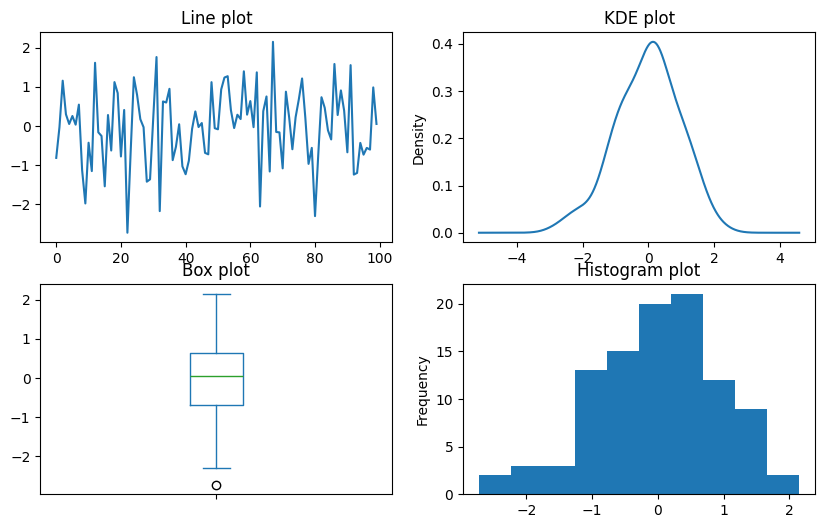

In [41]:
import matplotlib.pyplot as plt
s = pd.Series(rng.standard_normal(100))
s
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))
s.plot(kind='line', ax=axes[0,0]) ; axes[0,0].set_title("Line plot")
s.plot(kind='kde', ax=axes[0,1])  ; axes[0,1].set_title("KDE plot")
s.plot(kind='box', ax=axes[1,0])  ; axes[1,0].set_title("Box plot")
s.plot(kind='hist', ax=axes[1,1]) ; axes[1,1].set_title("Histogram plot")

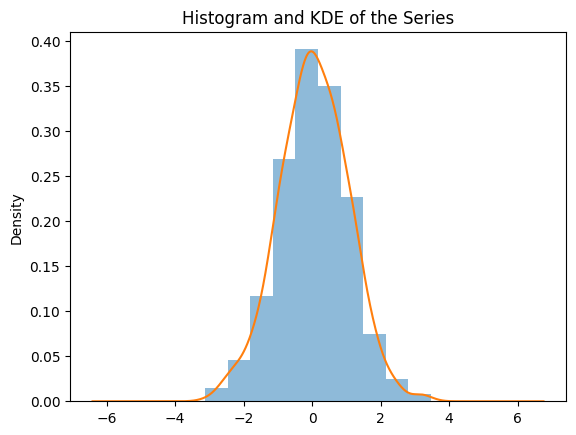

In [42]:
import matplotlib.pyplot as plt
s = pd.Series(rng.standard_normal(1000))
s.plot(kind='hist', alpha=0.5, density=True)
s.plot(kind='kde')
plt.title("Histogram and KDE of the Series")
plt.show()

In [43]:
s1 = pd.Series([1,2,3])
s2 = pd.Series([4,5,6])
s1, s2

(0    1
 1    2
 2    3
 dtype: int64,
 0    4
 1    5
 2    6
 dtype: int64)

In [44]:
s3 = pd.concat([s1, s2])
s3.reset_index()
s3

0    1
1    2
2    3
0    4
1    5
2    6
dtype: int64

In [45]:
s3 = pd.concat([s1, s2])
s3.reset_index(inplace=True, drop=True) # 这两个指令必须同时出现以改变index
s3

0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64

In [46]:
s3.pop(0) # 删除列表中的第一个元素,并返回该元素

np.int64(1)

In [47]:
s3

1    2
2    3
3    4
4    5
5    6
dtype: int64

In [48]:
s = pd.Series(["a", "b", "c", "a", "b", "c", "d"])

In [49]:
cat_ = pd.Categorical(s)
cat_.codes; cat_.categories

Index(['a', 'b', 'c', 'd'], dtype='object')

In [50]:
s_cat = s.astype("category")
s_cat.cat.categories

Index(['a', 'b', 'c', 'd'], dtype='object')

In [51]:
s_cat.cat.as_ordered()

0    a
1    b
2    c
3    a
4    b
5    c
6    d
dtype: category
Categories (4, object): ['a' < 'b' < 'c' < 'd']

In [52]:
pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6]})

,a,b
0,1,4
1,2,5
2,3,6


In [53]:
df = pd.DataFrame([[3,'a'], [5, 'b'], [7, 'c']], columns=['a', 'b'])

In [54]:
df.to_csv("df.csv", index=False)

In [55]:
pd.read_csv("df.csv")

,a,b
0,3,a
1,5,b
2,7,c


In [56]:
df.describe()

,a
count,3.0
mean,5.0
std,2.0
min,3.0
25%,4.0
50%,5.0
75%,6.0
max,7.0


In [57]:
df.size

6

In [58]:
df.dtypes

a     int64
b    object
dtype: object

In [59]:
df.shape

(3, 2)

<Axes: xlabel='carat', ylabel='price'>

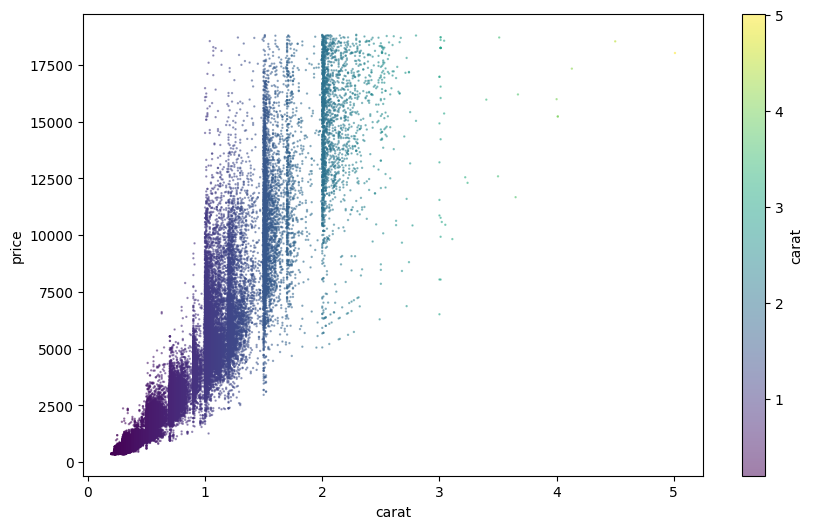

In [61]:
diamonds = pd.read_csv("data/diamonds.csv")
diamonds.plot(kind="scatter", x="carat", y="price", s=0.5, figsize=(10, 6), alpha=0.5, c='carat') # s是点的大小，c是颜色，alpha是透明度

In [ ]:
#diamonds['carat']
#type(diamonds['carat'])
#type(diamonds[['carat', 'price']])

# pandas

[pandas](https://pandas.pydata.org/) is an open source library for tabular heterogeneous data manipulation. The core structures are `Series` and `DataFrame` which can be seen as a collection of Series.  In addition `pandas` provides the necessary means for data cleaning and preparation. `pandas` uses NumPy array structure  as an extension type with methods for conversion in both directions.

&#9888; A major difference between numpy arrays and `pandas` Series and DataFrame is in the way that <tt>pandas</tt> indices are used. In NumPy the index is implicitly assigned $0..(n-1)$ whereas `pandas` Series and DataFrame have similar behaviour but in addition allow labels as indices which are preserved after applying operations.

Many parallels can be drawn between <tt>pandas</tt> and `tidyverse` R package. In terms of data structure, Series and DataFrame can be viewed as vectors and data.frame/tibble respectively. Furthermore, in terms of functionality most data manipulation operations available in tidyverse have a counterparts in <tt>pandas</tt>.


In [6]:
# convention
import pandas as pd
import numpy as np
rng = np.random.default_rng(12345)

## Series

[Series](https://pandas.pydata.org/docs/reference/api/pandas.Series.html) is a sequence of values, possibly of heterogeneous types. You can create Series with the <tt>pd.Series</tt> function.

**Synopsis: &nbsp; &nbsp;**<tt>Series(data=None, index=None, dtype=None, name=None, copy=False)</tt>
 - data: array, iterable, dict, scalar
 - index: 1-dimensional array, otherwise $0..(n-1)$
 - dtype: [data types](https://pandas.pydata.org/docs/user_guide/basics.html#basics-dtypes), otherwise inferred
 - name: optional
 - copy: default False, data is not copied but is a reference

In [ ]:
s = pd.Series([3,5,7])
s = pd.Series({'a':3, 'b':5, 'c':7})
s = pd.Series([3,5,7], index=['a','b','c'])

Caution, input data to pd.Series is not copied by default. Updating values in a Series will propagate to the source:

In [ ]:
arr = np.array([3,5,7])        # Source data
s = pd.Series(arr, copy=False) # default copy=False
s[1] = -1                      # set value s[1] to -1
arr

### loc/iloc

Series, besides the indices $0..(n-1)$, may also be viewed as a dictionary where values are accessed based on mapped indices to values:

In [ ]:
s = pd.Series({'a':3, 'b':5, 'c':7})
s['b']

In the above example we used the `s['b']` to fetch the value at label `b`. However it is recommended to use the method `loc` in case the Series is labeled, and `iloc` for indices. Take for example the the following Series with integers as labels:


In [ ]:
s = pd.Series(range(5), index=[4,2,7,0,1])
s[0], s.loc[0], s.iloc[0]

The slice `start:stop:step` will work in a similar way as in lists and numpy arrays if the Series has integer index 0..(n-1), but differs when slicing over labels:

In [ ]:
s = pd.Series({'a':3, 'b':5, 'c':7})
s.iloc[1:2], s.loc['b':'c'] # slice over labels includes the stop value.

Similar to python lists a slice of pandas Series is copy and not a view as it was the case for numpy arrays.


### Arithmetic operation

Operations between Series are carried out based on matching indices as opposed to element-wise which was the case in numpy.ndarray:

In [ ]:
s1 = pd.Series({'a':3, 'b':5, 'c':2})
s2 = pd.Series({'b':3, 'a':5, 'c':2})
s1+s2

and they don't have to be the same size:

In [ ]:
s3 = pd.Series({'b':3, 'a':5, 'c':2, 'd':10}) # no matching 'd' in s1
s1+s3

Index membership:

In [ ]:
"b" in s1 # s1 : {'a':3, 'b':5, 'c':2}

In contrast to NumPy arrays, and R vectors, being homogenous containers, Series may take up values of different types:

In [ ]:
s = pd.Series({'a':3, 'b':5, 'c':'7'})  # dtyp='O' for object
[type(v) for v in s]

### Series methods and accessors

Many function are defined at the top level of Series class. There are aloso several accessors, which give access to a collection functions related to a specific type, such as:

 | Accessor | Works With | Purpose |
| --- | --- | --- |
| `.str` | String data | String manipulation and operations |
| `.dt` | Datetime-like data | Datetime properties (e.g., year, month) and operations |
| `.cat` | Categorical data | Managing and manipulating categorical data |

An exhaustive review of [Series' methods and accessors](https://pandas.pydata.org/docs/reference/series.html#) is beyond the scope of this course. Here we only review several common uses:

In [ ]:
s1 = pd.Series(['apple', 'watermelon', 'orange', 'pear', 'cherry', 'strawberry'],
               index=list("abcdef"))
s2 = pd.Series(['apple', 'kiwi', 'orange', 'pear', 'cherry', 'grape'],
               index=list("abcdef"))
s3 = pd.Series(np.log(np.arange(0.1,10,.1)), index=np.arange(0.1,10,.1))
s4 = np.array([""])

s1.unique()
s1.count()
s1.compare(s2)
s1.filter(['a','b'])
s1.drop(['b','f'])
s3.apply(lambda x: np.abs(x))
# str:
s1.str.upper()
s1.str.contains('o')
s1.str.split('o')
# cat
# ...
# timestamp and dt accessor
dates = pd.Series(['1-4-1988', '1-1-1987', '1-12-2011', '1-6-2005', '1-5-2005'])
tss = pd.to_datetime(dates,format="%d-%m-%Y")
tss.min(), tss.max()
tss.sort_values()
#
s2.value_counts()

### Basic Series plotting

Series plotting enables quick and straightforward visualisation of data using the `plot()` method. It uses **Matplotlib** under the hood for rendering.

**Synopsis: &nbsp; &nbsp;**<tt>Series.plot(kind='type')</tt>

Below is the most common types:

- 'line' : line plot (default)
- 'hist' : histogram
- 'box' : boxplot
- 'kde' : Kernel Density Estimation plot



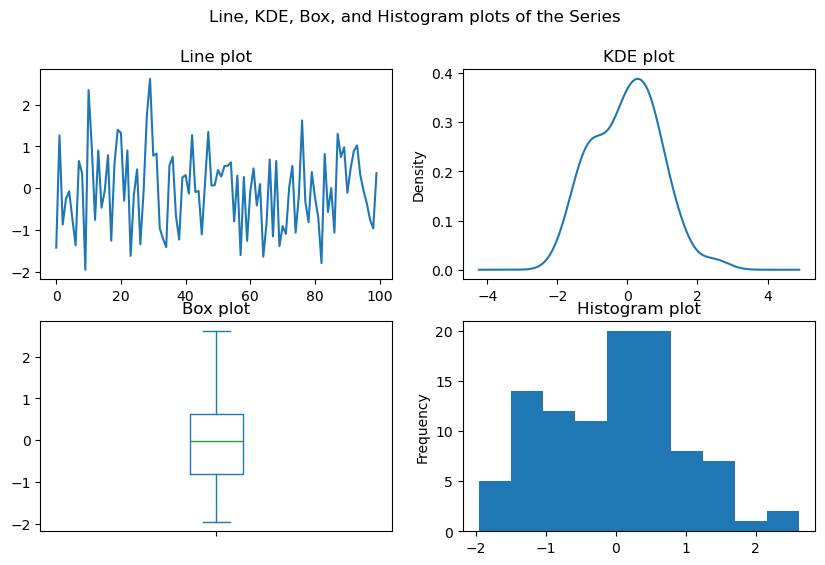

In [116]:
# 100 values standard normal
rng = np.random.default_rng(12345)
import matplotlib.pyplot as plt
s = pd.Series(rng.standard_normal(100))
# line, hist, box, kde
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))
s.plot(kind='line', ax=axes[0,0]) ; axes[0,0].set_title("Line plot")
s.plot(kind='kde', ax=axes[0,1])  ; axes[0,1].set_title("KDE plot")
s.plot(kind='box', ax=axes[1,0])  ; axes[1,0].set_title("Box plot")
s.plot(kind='hist', ax=axes[1,1]) ; axes[1,1].set_title("Histogram plot")
fig.suptitle("Line, KDE, Box, and Histogram plots of the Series")
plt.show()

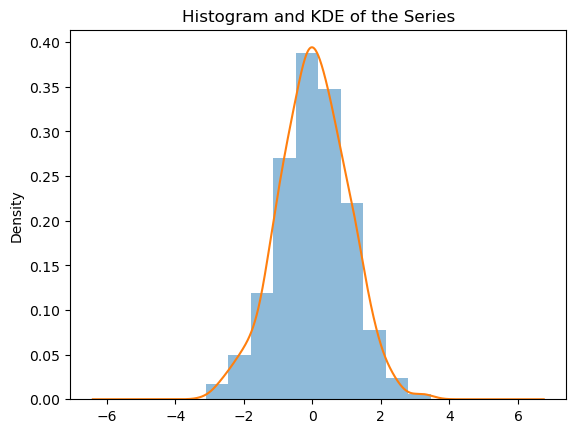

In [113]:
import matplotlib.pyplot as plt
s = pd.Series(rng.standard_normal(1000))
s.plot(kind='hist', alpha=0.5, density=True)
s.plot(kind='kde')
plt.title("Histogram and KDE of the Series")
plt.show()

The function `describe` returns  summary statistics:

In [ ]:
s.describe()

### Modify Series

To add values to a Series there is no instance method such append in list. Pandas function `concat` will take a list of Series and returns a Series containing combined values of the Series in the list.



In [ ]:
s1 = pd.Series([1,2,3])
s2 = pd.Series([4,5,6])
s3 = pd.concat([s1,s2])
s3.reset_index(drop=True, inplace=True)

Two ways to remove values, i) using Series `pop` function, ii) filter using boolean selction.

In [ ]:
v = s3.pop(1)  # s3 is updated with the value on index 4 removed and stored in v
s3 = s3[s3 >4] # remove values >4 from s3 and store new filtered data into s3

### Categorical variables (factors)

In **Pandas**, the `Categorical` data type may be used to represent categorical variables. It is designed to handle categorical data efficiently by internally storing categories as integers (levels) and imposing an order on the categories  as categories may be `ordered` and `unordered`. They are memory efficient and very convenient for grouping and summarising.


In [233]:
s = pd.Series(['a', 'b', 'c', 'a', 'b', 'c', 'd'])
# Categorical type
s1 = pd.Categorical(s, categories=['b','a','d']) # internal use (no Series methods)
# Extension
s2 = pd.Series(s, dtype='category')              # general use (Series)
s2 = s.astype('category')

type(s1), type(s2)

(pandas.core.arrays.categorical.Categorical, pandas.core.series.Series)

Categorical type has access methods directly available:

In [ ]:
s1.categories, s1.codes

Series with Categorical type has accessor `cat` for accessing methods:

In [ ]:
s2.cat.categories, s2.cat.codes

Below is an overview of some useful categorical functions:

| **Function/Method** | **Description**                                                                            |
| --- |--------------------------------------------------------------------------------------------|
| **`.set_categories()`** | Updates the categories to a new list, allowing reordering, adding, or removing categories. |
| **`.add_categories()`** | Adds new categories to the existing set of categories.                                     |
| **`.remove_categories()`** | Removes specific categories; values associated with them become `NaN`.                     |
| **`.remove_unused_categories()`** | Drops unused categories that do not appear in the data.                                    |
| **`.rename_categories()`** | Renames categories to new labels without modifying the underlying data.                    |
| **`.reorder_categories()`** | Reorders the categories into a specified order. Useful for sorting or comparisons.         |
| **`.as_ordered()`** | Converts the categories to ordered (enables `<`, `>` comparisons between values).          |
| **`.as_unordered()`** | Converts the categories to unordered (disabling logical comparisons).                      |





### Exercises


1. Given the Series `s` below, without running the code predicet the values and type of objects returned:


In [ ]:
s = pd.Series(np.arange(5),index=list("abcde"))

s['d']             # 3 => int64
s.loc['d']         # 3 => int64
s.iloc['d']        # Error : label used as index location
s.loc['b':'d']     # 1, 2, 3 => Series of int64
s.iloc[2::2][::-1] # 4, 2 => Series of int64
s.loc[['b', 'a']]  # 1, 0 => Series of int64

2. Predict the content of `s`, `s1`, `lst` and `ab`:

In [ ]:
lst, idx = np.arange(5), list("abcde")
s = pd.Series(lst,idx)
s[-1:] = 10               # ...
lst[0] = 5                # ...
s1 = pd.Series(s.copy())  # ...
s1[0] = -1                # ...
a = pd.Series([1,2,3,4,5], index=['a','b','c','d','e'])
b = pd.Series([1,2,3,4,5,6], index=['a','c','c','c','e','f'])
ab = a * b                # ...

3. Predict the result of the operations:

In [ ]:
s1 = pd.Series({'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4})
s2 = pd.Series({'d': 0, 'e': 1, 'f': 2, 'g': 3})

s1 + s2           # ...
s1['c':] * s2[:-2]  # ...

# DataFrame

The pandas' DataFrame is a 2-dimensional structure which may be viewed as a collection of Series. It has indices for both dimensions. We will use the terms observations and variables for rows and columns interchangeably. DataFrame, and Series, can hold dimensions $>2$ with the so called `hierarchical indexing` which is beyond the scope of this course.

&#9888; In the context of dataframes we will be working with homogeneous Series where each Series is of a single type.

To create a DataFrame use the function pd.DataFrame:

**Synopsis: &nbsp; &nbsp;**<tt>DataFrame(data=None, index=None, columns=None, dtype=None, copy=None)</tt>

Most arguments are familiar from pd.Series except `columns` with which the indices of the second dimension are controlled.


In [ ]:
df = pd.DataFrame(data=[[3,'a'], [5,'b'], [7,'c']],                    # list, tuple, or np.array
                  columns=['x', 'y'])                                  #
df = pd.DataFrame({'x': [3,5,7], 'y': ['a','b','c']})                  # dictionary of columns

## DataFrame : read/write

You may want to store or share with others the DataFrame you just created. The most common data format to store a DataFrame is comma-separated-values (csv) format. Use `to_csv` method to export a DataFrame and `pd.read_csv` import:

In [ ]:
df = pd.DataFrame({'x': rng.standard_normal(10), 'y': rng.standard_normal(10)})
df.to_csv("df.csv",index=False)   # write df to file 'df.csv', do not include index
df = pd.read_csv("df.csv")        # read df.csv into df object

## Inspect content

In [ ]:
df = pd.DataFrame({'x': rng.standard_normal(10), 'y': rng.standard_normal(10)}) # x and y two random variables

df.head()                   # top 5 (default) observation
df.tail(2)                  # last 2 observations
df.head(5).tail(2)          # composition
df.shape                    # size of the dimensions
df.size                     # total number of elements
df.columns                  # the columns indices/names
df.dtypes                   # listing of all columns' types
df.describe()               # descriptive summary of all variables

### Plotting

Same as pandas.Series, pandas.DataFrame has basic plotting capabilities where more than one variable may be involved.

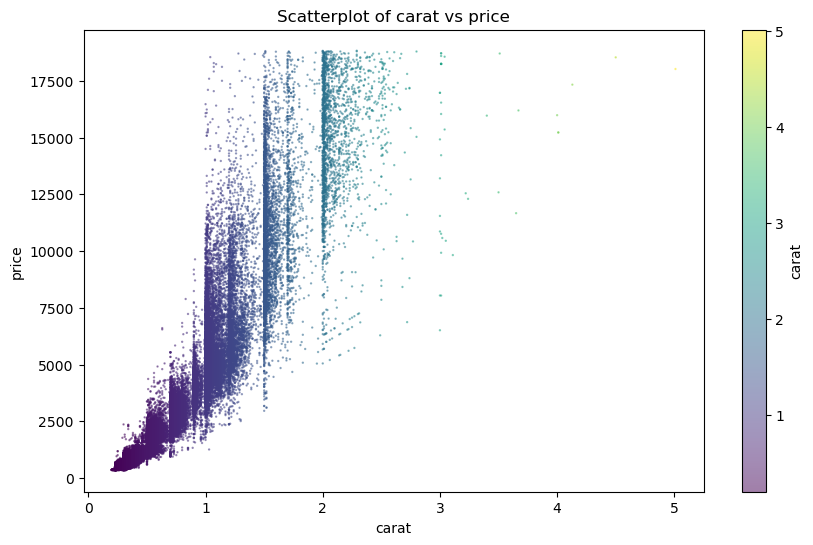

In [117]:
diamonds = pd.read_csv("data/diamonds.csv")
# scatterplot of carat vs price
diamonds.plot.scatter(x='carat', y='price', c='carat', s=.5,
                      figsize=(10,6), title="Scatterplot of carat vs price", alpha=0.5);

## Select columns

### Single column

You can select a column from a DataFrame using the square bracket `df["column_name"]` or `df.column_name`. When only one column name is given the result is a Series, with a list of columns the result is a DataFrame:

In [ ]:
df["x"]   # Series
df.x      # <=>  df["x"]
df[["x"]] # DataFrame

Only `valid python names` can be accessed through dot `.`:

In [ ]:
pd.DataFrame({'valid_name': [1,2,3], 'another variable':[3,2,1]  }).valid_name

### Multiple columns

Use a list of indices to select multiple columns:

In [ ]:
df[['Periods', 'TotalSupply_1']]  # explicit
df[df.columns[[1,2]]]             # use indices on df.columns

## Select rows

### Using logical criteria

Similar to NumPy logical masks we can filter out rows for which the logical condition succeeds. A condition on the variables of a DataFrame returns a logical value for each row in a format of a `Series` object:

In [ ]:
df = pd.DataFrame({'x': rng.standard_normal(10), 'y': rng.standard_normal(10)}) # x and y two random variables
df[((df.x < 0) & (df.y > 0))]  # parentheses are required

### Using index : loc method

Rows in a Dataframe are by default indexed with $[0,n)$. The `DataFrame` method `loc` can be used in the following forms:

- `df.loc[<row-label>]`                : select a row by numeric index
- `df.loc[<row-label>,<column-label>]` : select the indexed entry

Both row-label and column-label may take values such as, a single label,  list/array of labels, slices, boolean arrays and series. Though these indexing schemes may look similar to NumPy, there are two cautionary remarks:

- The labels are not positional indices.
- The slices used with `.loc` are inclusive of start and stop, i.e. [0,k].


In [ ]:
df.loc[1]               # [.] row 1 as a Series
df.loc[[1]]             # [[.]] row 1 as a DataFrame
df.loc[1,'x']           # [.,.] labels
df.loc[0:3, 'x':'y']    # [.,.] slices
df.loc[df.x > df.y,'x'] # [.,.] boolean

**iloc:** Also take a look at the method `iloc` which is similar to `loc` except it only accepts positional integers or ranges for rows and columns indices.

## Update variables

DataFrame's columns can be updated with an assignment `=` with or without a row selection:

In [ ]:
df.x=range(df.shape[0])            # variable size and the size of the new values must match.
df.loc[(df.x % 2 ==0),'y'] = None  # set y values to NaN where x is an even value

Value update according to a selection should only be done using `.loc` (or `.iloc`) method. For example both selections below are equivalent but only the `.loc` version can be used in an assignment:

In [ ]:
s1 = df[0::2]['y']      # selection with composition (aka chained)
s2 = df.loc[0::2, 'y']  # selection with loc
s1.equals(s2)           # s1 == s2
df[0::2]['y'] = -2      # warning
df.loc[0::2, 'y'] = -2  # valid

## Merge Series and DataFrames

To combine DataFrames use the `pd.concat` function:

**Synopsis: &nbsp; &nbsp;**<tt>concat(objs, axis=0, ignore_index=False, copy=True)</tt>

In [ ]:
s1 = pd.Series(list("abcd"))           # ['a', 'b', 'c', 'd']
s2 = pd.Series(range(4))               # [0, 4)
pd.concat([s1,s2])                     # Series
pd.concat([s1,s2], ignore_index=True)  # Series
pd.concat([s1,s2], axis=1)             # DataFrame

In [ ]:
df1 = pd.DataFrame({'a':range(3), 'b':list("abc")})
df2 = pd.DataFrame({'c':range(5), 'b':list("abcde"[::-1])})
pd.concat([df1,df2], axis=0, join='outer')  # along axis 0
pd.concat([df1,df2], axis=1, join='outer')  # along axis 1

## Add row to DataFrame

For this we can use the `pd.concat` function:

In [ ]:
df = pd.DataFrame({'Year': [2021, 2021], 'Month': [11, 12],'Day': [9, 16]})
new_row =  pd.DataFrame({'Year': [2023], 'Month': [3],'Day': [20]})
pd.concat([df, new_row])

## Missing values

In the context of DataFrames we have the notion of missing values and are typically represented by `np.nan` (from NumPy) or `None` (from Python). Both indicate missing or null data.

In [ ]:
s = pd.Series(["0", float('nan'), np.nan,  2, None])
[type(v) for v in s]

#
df = pd.DataFrame({"s":[1,np.nan,3,None, 5], "t":["a",np.nan, "c",None, "e"]})
df['s'].dtype,df['t'].dtype,

### Handling missing data

Possible actions when dealing with missing data are  *summarise*, *remove* or *replace* missing values.

To be able to do any action on missing values you'll need to first find them. DataFrame and Series have the methods `isna` and `isnull` (alias to `isna`) for finding missing values. Both return a logical mask with `True` marking the location of the missing values. We will use `isna` throughout the lectures.

In [ ]:
s.isna()      # isna: boolean marking missing value
s[s.notna()]  # <=> s[~ s.isna()]

With `dropna` you may discard all missing from a Series object. With DataFrames you'll have more control in how to discard the missing.

**Synopsis: &nbsp; &nbsp;**<tt>pandas.DataFrame.dropna(axis=0, how='any', thresh=None, inplace=False)</tt>

In [ ]:
sample_space = np.arange(10).tolist() + ([np.nan]*2)
df = pd.DataFrame(rng.choice(sample_space,25).reshape(5,5))

In [ ]:
df.dropna(axis=0) # default : drop rows having any missing values
df.dropna(axis=1) # drop columns having any missing values
df.dropna(axis=1, how='all') # drop columns having only missing values

With `fillna` we can replace the missing with values, either fixed or a set of values (Series,DataFrame etc.) according to the indices. We only illustrate scalars here:

In [ ]:
df.fillna(0)

## Group operations

When the data has categorical variables we may be interested in descriptive statistics on each group. This can be done by first grouping the data with `groupby` method and then summarise on those groups. I'll use the [diamonds](https://ggplot2.tidyverse.org/reference/diamonds.html) dataset for illustration.

In [ ]:
diamonds = pd.read_csv("data/diamonds.csv") # read diamonds.csv

In [ ]:
grp = diamonds[diamonds.columns.drop(['color'])].groupby(['cut', 'clarity'], as_index=False) #
grp.ngroups
grp.agg({'price': 'mean', 'carat': 'sum'})

### Exercise



#### Merge DataFrames

Given `df1`, `df2` and `df3` apply the following:

- merge df1 and df2 side by side
- merge df1 and df3 stacked
- merge all and reset index

In [ ]:
df1 = pd.DataFrame({'name': ['ants', 'bees','wasps'] , 'order':['Hymenoptera']*3})
df2 = pd.DataFrame({'name': ['beetles', 'weevils'] , 'order':['Coleoptera']*2})
df3 = pd.DataFrame({'name': ['butterflies', 'moths'], 'order':['Lepidoptera']*2 })

In [ ]:
# ...

#### Missing values

Given the following DataFrame

In [ ]:
df = pd.DataFrame(np.arange(25).reshape(5,5))

set the values to NaN as such to reproduce the following DataFrame:

In [ ]:
# ...

Apply the following on the dataframe with missing values created in the previous step.

Drop missing:
- rows with missing values
- columns with missing values
- rows where all values are missing
- columns where all values are missing

Fill missing:
- with 0
- with mean based on column values
- with median based on row values

In [ ]:
# ...

### Natural gas consumption in the Netherlands

The dataset can be downloaded from [CBS Open data StatLine](https://opendata.cbs.nl/statline/portal.html?_la=en&_catalog=CBS). A version is already included in the data directory of this session's git repository.

We first read the data with `pd.read_csv`. For this exercise we only work with the columns `Periods` and `TotalSupply_1:

In [170]:
cbs = pd.read_csv("data/00372eng_UntypedDataSet_16032025_143103.csv",sep=";")
df = cbs[['Periods','TotalSupply_1']]
df


,Periods,TotalSupply_1
0,1946JJ00,0
1,1947JJ00,1
2,1948JJ00,5
3,1949JJ00,7
4,1950JJ00,5
...,...,...
764,2024MM11,3287
765,2024MM12,3461
766,2024KW04,8993
767,2025MM01,4060


Each entry give the total consumption `TotaalAanbod_1` in units of million cubic metre (MCM). The column `Periods`has the year (yyyy) followed by a tag {JJ,KW,MM} representing the yearly, quarterly and monthly terms respectively, followed by two digits `00..12`. The two digit followed by the tags have different meaning per tag. For JJ it is always `00`, MM with `00..12` for 12 months and `KW` with  `01..04` for four quarters.


In order to get more control over the entry date we will need to create a new variable `date` in the dataset using the given `Periods`. Hint: see Series.str accessor functions for manipulating strings and pd.Timestamp for dates.



1. Write a function given a Series with {year,term,idx} returns a timestamp according to the specification below. In all cases the last day of the period is chosen as the date, e.g. 1954KW03  will be 30-09-1954.

```
JJ : yyyyJJ00 => 31-12-yyyy
KW : yyyyKWmm => where mm in {1,2,3,4}
                 01: 1-1-yyyy to 31-3-yyyy
                 02: 1-4-yyyy to 30-6-yyyy
                 03: 1-7-yyyy to 30-9-yyyy
                 04: 1-10-yyyy to 31-12-yyyy
MM : yyyyMMmm => dd-mm-yyyy where dd is the last day of the month and
                 mm in {1,..,12}
```


2. Create a new DataFrame called `ngc` (natural gas consumption) with three columns {term, date, consumption} :
    - term : {JJ,KW,MM}
    - date : timestamps
    - consumption: which is `TotalSupply_1` only renamed

3. Evaluate the entries in `ngc` dataframe by checking whether the sum of monthly 'MM' and quarterly 'KW' add up to yearly 'JJ' consumptions.